In [138]:
from tensorflow.keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plt

In [139]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [140]:
train_images = train_images / 255

In [141]:
train_images.shape

(60000, 28, 28)

In [142]:
len(train_labels)

60000

In [143]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [144]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

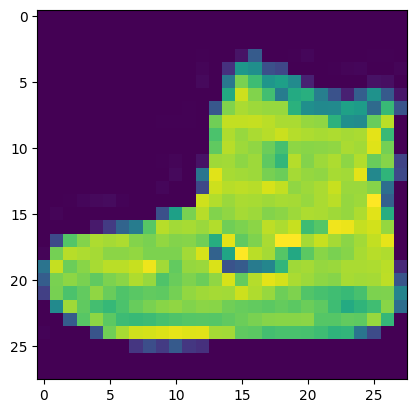

In [145]:
plt.imshow(train_images[0])
plt.show()

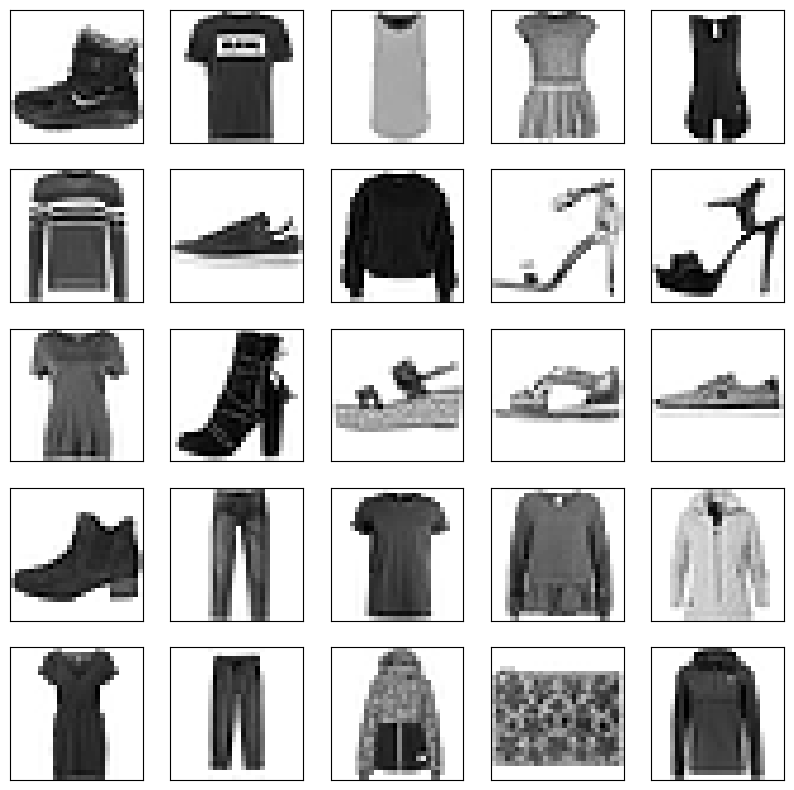

In [146]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

### Plot the training and validation error and accuracy metrics.

In [147]:
nn = models.Sequential([
	layers.Flatten(input_shape=(28, 28)),
	layers.Dense(128, activation="relu"),
	layers.Dense(64, activation="relu"),
	layers.Dense(10, activation="softmax")
])

nn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = nn.fit(train_images, train_labels, epochs=10, validation_split=0.1, batch_size=32)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7731 - loss: 0.6592 - val_accuracy: 0.8503 - val_loss: 0.4221
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8589 - loss: 0.3826 - val_accuracy: 0.8652 - val_loss: 0.3667
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8757 - loss: 0.3378 - val_accuracy: 0.8633 - val_loss: 0.3739
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8810 - loss: 0.3193 - val_accuracy: 0.8740 - val_loss: 0.3469
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8910 - loss: 0.2962 - val_accuracy: 0.8790 - val_loss: 0.3429
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8975 - loss: 0.2800 - val_accuracy: 0.8783 - val_loss: 0.3399
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9007 - loss: 0.2665 - val_accuracy: 0.8852 - val_loss: 0.3188
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9055 - loss: 0.2484 

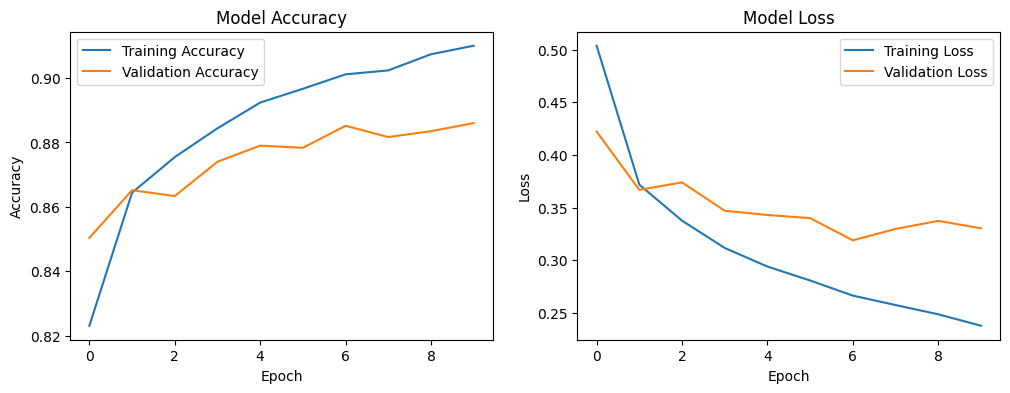

In [148]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### What hyperparameters did you use to tune your model and why? For example, the number of hidden layers, number of neurons, activation function, input features, etc.

We are using two hidden layers with reasonable number of neurons. Due to the amount of neurons, the model can capture complex patterns in the Fashion MNIST dataset without overfitting.

The numbers of neurons in the hidden layers are: 128 in the first layer, and 64 in the second layer. A greater number of neurons in the first layer allows the model to learn a borad range of features, while a slightly smaller number in the second layer balances model complexity and efficiency.

We use the ReLU activation function for the hidden layers. ReLU is generally efficient for hidden layers due to it introducing non-linearity, enabling the mdoel to learn more complex patterns.

For the output layer activation, the softmax activation function was chosen sience this is a multiclass classification problem. Softmax converts the output to probability distributions across the 10 classes, helping the model predict the likelihood of each class.

A bact size of 32 is a common choice that provides a balance between traning speed and stability in gradient updates.

For the optimizer, we went with Adam. It was selected as it adapts the learning rate during training, often resulting in faster convergence.